## Where Do People Drink The Most Beer, Wine And Spirits?

<img src="https://s1.qwant.com/thumbr/0x0/3/f/a2d61eb9aa851a55e62456389bde7986e358da62a08b5c5ac98aaa851447dc/alcoholconsumption.gif?u=http%3A%2F%2F4.bp.blogspot.com%2F-0u5Sk_omAEE%2FTV3XZtyPQ1I%2FAAAAAAAAArc%2FyVlSiUp6aTU%2Fs1600%2Falcoholconsumption.gif&q=0&b=1&p=0&a=1">

The dataset for this analysis is from this post in [FiveThirtyEight](https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/)

Data: https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 7.7+ KB


## Problem 1
Convert the following data into tidy format with the headers `country`, `drink` and `servings`. Drop the column `total_litres_of_pure_alcohol`

In [ ]:
tidy_df = df.melt(
    id_vars=['country'], # columns that you want to keep unchanged
    value_vars = ['beer_servings', 'spirit_servings', 'wine_servings'], # columns that you want to convert to rows
    var_name="drink", # header for the summary columns
    value_name="servings" # header for the values
)
tidy_df

,country,drink,servings
0,Afghanistan,beer_servings,0
1,Albania,beer_servings,89
2,Algeria,beer_servings,25
3,Andorra,beer_servings,245
4,Angola,beer_servings,217
...,...,...,...
574,Venezuela,wine_servings,3
575,Vietnam,wine_servings,1
576,Yemen,wine_servings,0
577,Zambia,wine_servings,4


## Problem 2
Remove `"_servings"` from the data in the tidy dataframe in Problem 1. Who drinks the most beer, wine and spirits? Create three categorical plots of your choice to illustrate the top 10 countries that drink the most wine, beer or spirits.

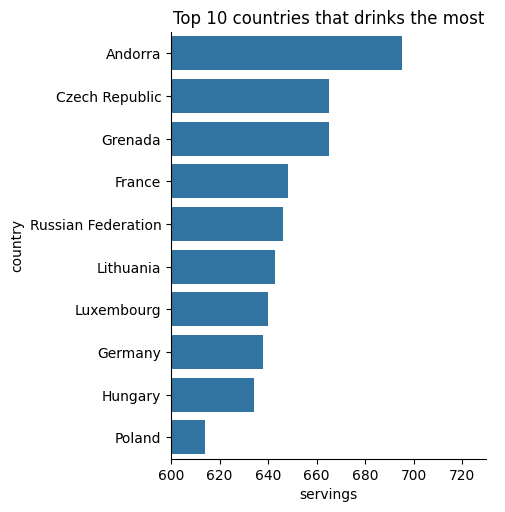

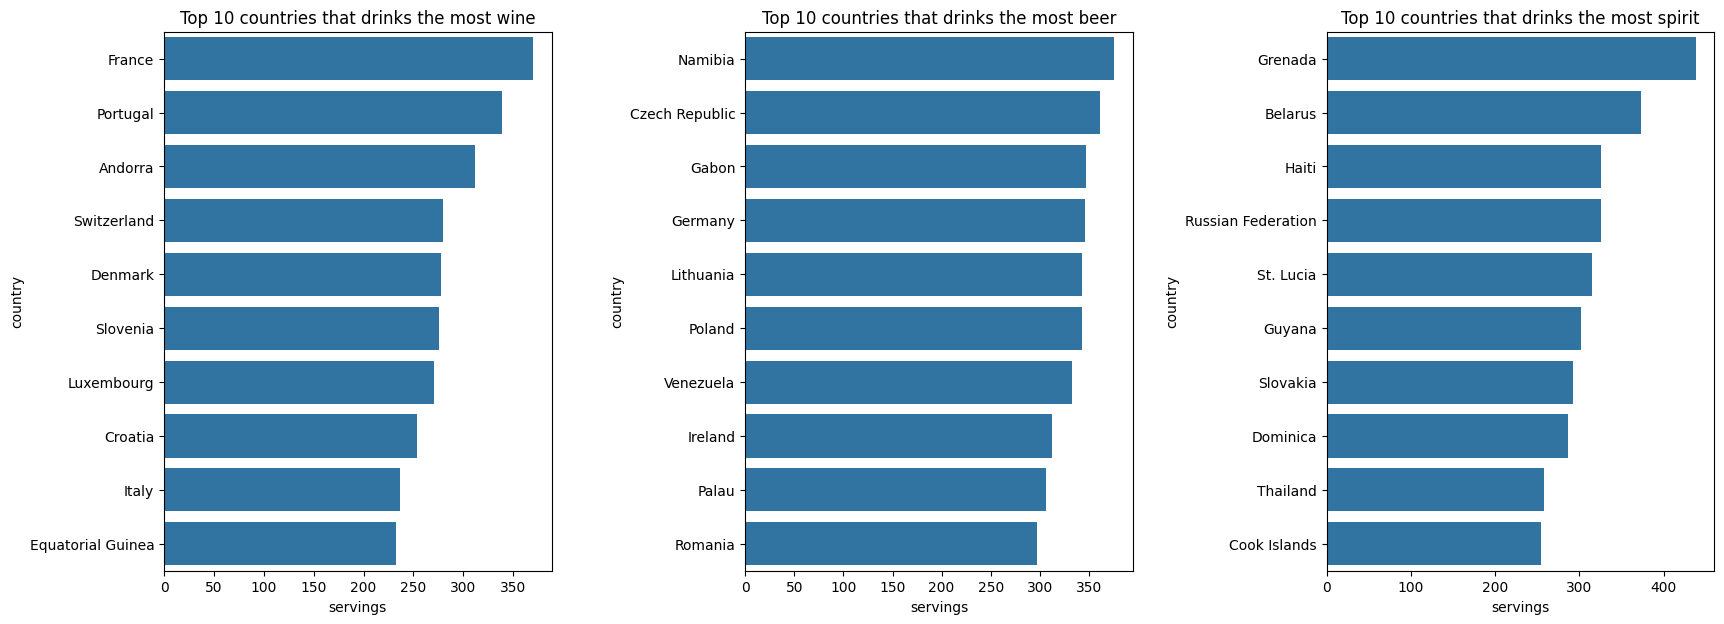

In [ ]:
tidy_df['drink'] = tidy_df['drink'].str.replace('_servings', '')
topAll = tidy_df.groupby('country')['servings'].sum().nlargest(10)
topAll = pd.DataFrame(topAll)
sns.catplot(data=topAll,
            x='servings',
            y='country',
            kind = 'bar'
            )
plt.xlim(600)
plt.title("Top 10 countries that drinks the most")

top10wine = tidy_df[tidy_df['drink'] == 'wine'].groupby('country')['servings'].sum().nlargest(10)
top10beer = tidy_df[tidy_df['drink'] == 'beer'].groupby('country')['servings'].sum().nlargest(10)
top10spirit = tidy_df[tidy_df['drink'] == 'spirit'].groupby('country')['servings'].sum().nlargest(10)
top10wine = pd.DataFrame(top10wine)
top10beer = pd.DataFrame(top10beer)
top10spirit = pd.DataFrame(top10spirit)

fig, axes = plt.subplots(1, 3, figsize=(20, 7))
sns.barplot(data=top10wine,
            x='servings',
            y='country',
            ax=axes[0]
            )
axes[0].set_title("Top 10 countries that drinks the most wine")


sns.barplot(data=top10beer,
            x='servings',
            y='country',
            ax=axes[1]
            )
axes[1].set_title("Top 10 countries that drinks the most beer")

sns.barplot(data=top10spirit,
            x='servings',
            y='country',
            ax=axes[2]
            )
axes[2].set_title("Top 10 countries that drinks the most spirit")
plt.subplots_adjust(wspace=0.5)

## Problem 3
Create a wide dataframe using `pivot_table` with the tidy dataframe from Problem 2

In [ ]:
tidy_df.pivot_table(index = 'drink', columns = 'country', values = 'servings')

country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua & Barbuda,Argentina,Armenia,Australia,Austria,...,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
drink,,,,,,,,,,,,,,,,,,,,,
beer,0.0,89.0,25.0,245.0,217.0,102.0,193.0,21.0,261.0,279.0,...,16.0,219.0,115.0,25.0,21.0,333.0,111.0,6.0,32.0,64.0
spirit,0.0,132.0,0.0,138.0,57.0,128.0,25.0,179.0,72.0,75.0,...,135.0,126.0,35.0,101.0,18.0,100.0,2.0,0.0,19.0,18.0
wine,0.0,54.0,14.0,312.0,45.0,45.0,221.0,11.0,212.0,191.0,...,5.0,195.0,220.0,8.0,11.0,3.0,1.0,0.0,4.0,4.0
